## importação

In [124]:
from sklearn.cluster import KMeans 

import pandas as pd 

from sklearn.preprocessing import MinMaxScaler 

from matplotlib import pyplot as plt 

## Carregando Dataset

In [125]:
df = pd.read_csv('homicide_statistics.csv')

## Verificando os Dados

In [126]:
df.head(10)

,period,incidents_NSW,incidents_VIC,incidents_QLD,incidents_WA,incidents_SA,incidents_TAS,incidents_ACT,NT,incident_rate_NSW,...,filicide,parricide,sibilicide,other_family,firearm,knife_or_other_sharp_instrument,blunt_instrument,hands_and_feet,other,not_state_or_unknown
0,1989-90,95,74,68,25,20,5,0,20,1.63,...,16,7,4,7,76,99,8,107,7,0
1,1990-91,119,72,56,22,22,5,0,28,2.02,...,16,9,5,9,68,107,37,93,2,0
2,1991-92,106,54,68,29,27,9,2,18,1.78,...,16,9,5,8,63,89,39,93,7,5
3,1992-93,112,59,73,34,30,6,1,17,1.87,...,17,12,4,11,84,102,37,85,4,0
4,1993-94,118,48,62,36,29,5,2,23,1.95,...,24,11,7,13,60,117,44,83,5,2
5,1994-95,90,74,60,46,29,5,4,19,1.47,...,19,15,10,15,80,106,41,76,11,0
6,1995-96,110,52,66,34,13,6,1,21,1.78,...,20,11,4,13,67,99,35,69,4,0
7,1996-97,100,51,80,23,22,3,2,18,1.60,...,16,11,10,15,65,104,37,62,19,4
8,1997-98,107,42,74,34,27,4,1,11,1.70,...,18,18,3,8,63,107,23,70,33,2
9,1998-99,112,54,64,33,38,7,2,18,1.76,...,21,11,3,10,59,107,37,89,28,0


## Exibição do Número de linhas e Número de colunas

In [127]:
df.shape

(34, 45)

## contar os valores ausentes

In [128]:
df.isna().sum()

period                             0
incidents_NSW                      0
incidents_VIC                      0
incidents_QLD                      0
incidents_WA                       0
incidents_SA                       0
incidents_TAS                      0
incidents_ACT                      0
NT                                 0
incident_rate_NSW                  0
incident_rate_VIC                  0
incident_rate_QLD                  0
incident_rate_WA                   0
incident_rate_SA                   0
incident_rate_TAS                  0
incident_rate_ACT                  0
incident_rate_NT                   0
cleared_by_charge                  0
offender_died_by_suicide           0
cleared_otherwise                  0
cleared                            0
not_cleared                        0
murder                             0
manslaughter                       0
infanticide                        0
domestic                           0
acquaintance                       0
s

 ## Exibe um resumo informativo sobre o DataFrame

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   period                           34 non-null     object 
 1   incidents_NSW                    34 non-null     int64  
 2   incidents_VIC                    34 non-null     int64  
 3   incidents_QLD                    34 non-null     int64  
 4   incidents_WA                     34 non-null     int64  
 5   incidents_SA                     34 non-null     int64  
 6   incidents_TAS                    34 non-null     int64  
 7   incidents_ACT                    34 non-null     int64  
 8   NT                               34 non-null     int64  
 9   incident_rate_NSW                34 non-null     float64
 10  incident_rate_VIC                34 non-null     float64
 11  incident_rate_QLD                34 non-null     float64
 12  incident_rate_WA        

**Explicação**:
Colunas específicas do dataset que são relevantes para a análise de homicídios em diferentes contextos. Estas colunas são:

- **incident_rate_NSW** e **incident_rate_VIC**: Taxas de incidentes em New South Wales (NSW) e Victoria (VIC), respectivamente.
- **domestic_rate_per_100K**: Taxa de homicídios domésticos por 100.000 habitantes.
- **acquaintance_rate_per_100K**: Taxa de homicídios por conhecidos por 100.000 habitantes.
- **stranger_rate_per_100K**: Taxa de homicídios por estranhos por 100.000 habitantes.
- **count_female** e **count_male**: Contagem de vítimas femininas e masculinas.
Sentido de usar essas colunas:
Essas colunas fornecem uma visão abrangente das taxas de homicídios em diferentes regiões e contextos (doméstico, conhecido, estranho), além de considerar o gênero das vítimas. Isso ajuda a identificar padrões e variações geográficas e contextuais nos homicídios.

In [130]:
# Seleção de colunas para análise
selected_columns = ['incident_rate_NSW', 'incident_rate_VIC', 'domestic_rate_per_100K', 
                    'acquaintance_rate_per_100K', 'stranger_rate_per_100K', 'count_female', 'count_male']

Essas colunas fornecem uma visão abrangente das taxas de homicídios em diferentes regiões e contextos (doméstico, conhecido, estranho), além de considerar o gênero das vítimas. Isso ajuda a identificar padrões e variações geográficas e contextuais nos homicídios.

In [131]:
# Normalização dos dados
## Usamos MinMaxScaler para normalizar os dados, de modo que todas as variáveis fiquem dentro do mesmo intervalo.
scaler = MinMaxScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])

In [132]:
# Método Elbow para determinar o número de clusters
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[selected_columns])
    sse.append(km.inertia_)

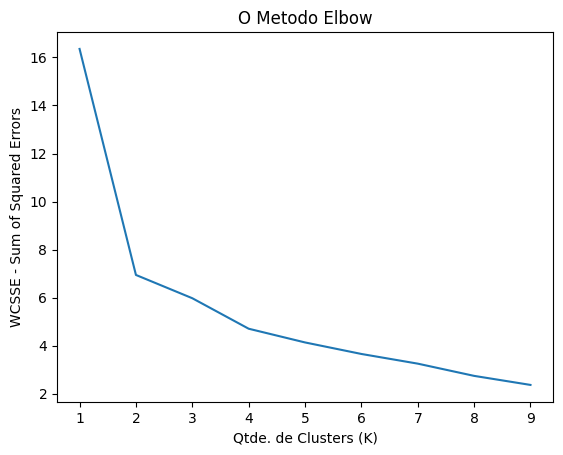

In [133]:
plt.title('O Metodo Elbow') 

plt.xlabel('Qtde. de Clusters (K)') 

plt.ylabel('WCSSE - Sum of Squared Errors') # Within Cluster Sum of Squares 

plt.plot(k_rng,sse) 

**Explicação:**
Construímos o modelo KMeans com 3 clusters (baseado na análise do método Elbow) e ajustamos o modelo aos dados. fit_predict retorna os rótulos dos clusters.

In [134]:
# Construção do modelo de clustering com KMeans
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df[selected_columns]) 

In [135]:
# Adicionar a coluna de clusters ao dataframe
df['cluster'] = y_predicted


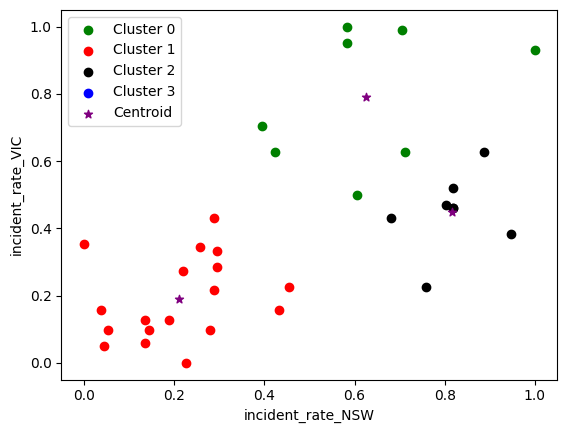

In [136]:
# Separação dos clusters
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]

# Plotagem dos clusters usando duas das colunas para visualização
plt.scatter(df1['incident_rate_NSW'], df1['incident_rate_VIC'], color='green', label='Cluster 0')
plt.scatter(df2['incident_rate_NSW'], df2['incident_rate_VIC'], color='red', label='Cluster 1')
plt.scatter(df3['incident_rate_NSW'], df3['incident_rate_VIC'], color='black', label='Cluster 2')
plt.scatter(df4['incident_rate_NSW'], df4['incident_rate_VIC'], color='blue', label='Cluster 3')

# Plotagem dos centróides
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroid')
plt.xlabel("incident_rate_NSW")
plt.ylabel('incident_rate_VIC')
plt.legend()
plt.show()

**Conclusão dos Centróides**
Os centróides representam os pontos médios dos clusters e fornecem uma visão geral das características médias dos homicídios em cada cluster. Por exemplo:

- **Cluster 0** pode representar áreas com taxas moderadas de incidentes e características demográficas equilibradas.
- **Cluster 1** pode representar áreas com altas taxas de homicídios domésticos.
- **Cluster 2** pode representar áreas com baixas taxas de homicídios por conhecidos.
- **Cluster 3** pode representar áreas com altas taxas de homicídios por estranhos.


Essa análise nos ajuda a identificar padrões e tendências nos dados de homicídios, podendo orientar políticas públicas e ações preventivas em diferentes regiões e contextos.